In [1]:
# Install the AllenSDK package using pip
# !pip install allensdk

In [4]:
# Import necessary libraries for data analysis and visualization
from pathlib import Path  # For handling file paths
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns  # For enhancing plot aesthetics
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis
import matplotlib  # For configuring plot settings

# Importing modules for machine learning and deep learning
import sklearn  # For machine learning algorithms
from sklearn.decomposition import PCA  # For principal component analysis
import torch  # For deep learning framework
from torch import nn  # For defining neural network layers
from torchvision.transforms import Resize  # For image resizing

# Setting plot aesthetics
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})
matplotlib.rcParams['figure.figsize'] = (10, 7)  # Set default figure size
plt.rcParams['figure.dpi'] = 150  # Set default figure DPI for high-resolution displays

# Importing specific modules from AllenSDK for accessing Allen Brain Observatory data
import allensdk  # Importing AllenSDK
import allensdk.brain_observatory.behavior.behavior_project_cache as bpc  # For behavior project cache
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache  # For accessing Allen Brain Observatory data

# Print the version of AllenSDK being used
print(f"Your allensdk version is: {allensdk.__version__}")

Your allensdk version is: 2.15.2


In [7]:
# Import necessary libraries
from pathlib import Path  # For working with file paths

# Set the directory where the data will be downloaded to
output_dir = r"C:\Users\abalwani6\Documents\Spring 2024\CelltypeRNN"

# Ensures that the full dataset will be downloaded
DOWNLOAD_COMPLETE_DATASET = True 

# Convert to a path object
output_dir = Path(output_dir)

# Import the VisualBehaviorOphysProjectCache class from the cache module
import allensdk.brain_observatory.behavior.behavior_project_cache as bpc

# Initialize the cache object using the VisualBehaviorOphysProjectCache class
# from_s3_cache() method is used to load data from an S3 bucket cache
# cache_dir parameter specifies the directory where the cache will be stored
cache = bpc.VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=output_dir)

# Set the directory where the data will be downloaded to
cache_dir = r"Data"

# Initialize another cache object using the VisualBehaviorOphysProjectCache class
# from_s3_cache() method is used to load data from an S3 bucket cache
# cache_dir parameter specifies the directory where the cache will be stored
bc = bpc.VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=cache_dir)

C:\Users\abalwani6\AppData\Local\anaconda3\envs\allensdk\lib\site-packages\allensdk\api\cloud_cache\cloud_cache.py:413: MissingLocalManifestWarning: This cache directory appears to contain data files, but it has no record of what those files are. You might want to consider running

VisualBehaviorOphysProjectCache.construct_local_manifest()

to avoid needlessly downloading duplicates of data files that did not change between data releases. NOTE: running this method will require hashing every data file you have currently downloaded and could be very time consuming.

To avoid this warning in the future, make sure that

C:\Users\abalwani6\Documents\Spring 2024\CelltypeRNN\_downloaded_data.json

is not deleted between instantiations of this cache
  warnings.warn(msg, MissingLocalManifestWarning)
ophys_session_table.csv: 100%|██████████| 247k/247k [00:00<00:00, 1.13MMB/s] 
behavior_session_table.csv: 100%|██████████| 1.59M/1.59M [00:00<00:00, 2.16MMB/s]
ophys_experiment_table.csv: 100%|█████

In [8]:
# Retrieve the session/experiment from the cache
behavior_session_table = bc.get_behavior_session_table()
ophys_session_table = bc.get_ophys_session_table()
experiment_table = bc.get_ophys_experiment_table()

# Print the number of sessions/experiments
print(f"Number of behavior sessions = {len(behavior_session_table)}")
print(f"Number of ophys sessions = {len(ophys_session_table)}")
print(f"Number of ophys experiments = {len(experiment_table)}")

Number of behavior sessions = 4782
Number of ophys sessions = 703
Number of ophys experiments = 1936


In [9]:
# visualize the experiment table 
experiment_table.sample(3)

,behavior_session_id,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,...,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
1089128031,1089052619,1089037437,1086191444,550603,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Novel 1,0,0,6,2021-03-09 12:58:32.070,MESO.1,2021-08-12,1064781085,1756
1078699506,1078628356,1078596841,1074913344,544965,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,False,Novel >1,0,2,6,2021-01-25 12:59:08.057,MESO.1,2021-08-12,1053696193,1142
911642167,911527254,911449165,906963896,462544,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),M,...,True,Familiar,0,13,1,2019-07-24 12:38:29.391,CAM2P.3,2021-03-25,876289252,1401


In [10]:
# some useful variables 
pc_line_str = 'Slc17a7-IRES2-Cre' 
vip_line_str = 'Vip-IRES-Cre' 
sst_line_str = 'Sst-IRES-Cre' 

In [11]:
# Filtering by cell type
pc_exp_table = experiment_table[experiment_table['cre_line'] == pc_line_str]
vip_exp_table = experiment_table[experiment_table['cre_line'] == vip_line_str]
sst_exp_table = experiment_table[experiment_table['cre_line'] == sst_line_str]

# numbers 
print(f"Number of experiments with PC neurons = {len(pc_exp_table)}")
print(f"Number of experiments with VIP neurons = {len(vip_exp_table)}")
print(f"Number of experiments with SST neurons = {len(sst_exp_table)}")

Number of experiments with PC neurons = 871
Number of experiments with VIP neurons = 663
Number of experiments with SST neurons = 402


In [12]:
pc_exp_table

,behavior_session_id,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,...,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
877696762,877287655,877103886,876693090,449441,GCaMP6s,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai94(TITL-GCaMP6s),M,...,True,Familiar,0,29,2,2019-05-29 08:58:18.721,CAM2P.3,2021-03-25,838753497,66
879332693,878703444,878436988,876693090,449441,GCaMP6s,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai94(TITL-GCaMP6s),M,...,False,Familiar,2,31,4,2019-05-31 09:36:07.080,CAM2P.3,2021-03-25,838753497,67
880375092,879846624,879719132,876693090,449441,GCaMP6s,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai94(TITL-GCaMP6s),M,...,False,Novel 1,0,0,5,2019-06-03 08:45:50.517,CAM2P.3,2021-03-25,838753497,68
881881171,881210695,881071629,876693090,449441,GCaMP6s,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai94(TITL-GCaMP6s),M,...,False,Novel >1,0,2,7,2019-06-05 08:54:59.063,CAM2P.3,2021-03-25,838753497,69
882935355,882669474,882620042,876693090,449441,GCaMP6s,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai94(TITL-GCaMP6s),M,...,False,Novel >1,1,3,8,2019-06-07 08:49:13.158,CAM2P.3,2021-03-25,838753497,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051216600,1051138449,1051120218,1046279796,533162,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),M,...,False,Novel >1,2,5,8,2020-09-17 10:14:33.120,CAM2P.4,2021-03-25,1037689249,1824
775614751,775378326,775289198,782536745,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,...,False,Familiar,1,44,5,2018-11-08 11:22:06.936,CAM2P.5,2021-03-25,730814230,1905
778644591,778166125,778015591,782536745,403491,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,...,True,Familiar,2,47,8,2018-11-13 10:23:58.715,CAM2P.5,2021-03-25,730814230,1906


In [13]:
vip_exp_table

,behavior_session_id,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,...,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
792815735,792680306,792619807,791352433,412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,19,1,2018-12-10 13:37:29.143,CAM2P.4,2021-03-25,754116317,53
795073741,794968300,794918442,791352433,412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,21,3,2018-12-13 13:33:06.390,CAM2P.4,2021-03-25,754116317,54
795953296,795742990,795625712,791352433,412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Novel 1,0,0,4,2018-12-14 12:37:49.365,CAM2P.4,2021-03-25,754116317,55
796108483,796052844,796044280,791352433,412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,True,Novel >1,0,1,5,2018-12-15 13:11:14.373,CAM2P.4,2021-03-25,754116317,56
796308505,796251270,796236521,791352433,412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Novel >1,0,2,6,2018-12-16 13:15:04.328,CAM2P.4,2021-03-25,754116317,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993590480,993537991,993512923,991913246,489066,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,True,Familiar,0,12,2,2019-12-10 12:25:49.549,CAM2P.4,2021-03-25,967103425,1917
993862120,993691759,993668836,991913246,489066,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Novel 1,0,0,3,2019-12-11 08:57:44.877,CAM2P.4,2021-03-25,967103425,1918
994053909,993959724,993948045,991913246,489066,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,True,Novel >1,0,1,4,2019-12-12 09:29:20.785,CAM2P.4,2021-03-25,967103425,1919


In [14]:
sst_exp_table

,behavior_session_id,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,...,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
951980471,951520319,951410079,1018028342,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837,MESO.1,2021-03-25,848974280,0
951980473,951520319,951410079,1018028345,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837,MESO.1,2021-03-25,848974280,1
951980475,951520319,951410079,1018028339,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837,MESO.1,2021-03-25,848974280,2
951980479,951520319,951410079,1018028354,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837,MESO.1,2021-03-25,848974280,3
951980481,951520319,951410079,1018028357,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837,MESO.1,2021-03-25,848974280,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961283857,961246494,961226856,957024596,467302,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,True,Familiar,0,28,2,2019-10-04 14:59:16.445,CAM2P.5,2021-03-25,894191516,1874
962471831,962346335,962206869,957024596,467302,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,False,Familiar,0,29,3,2019-10-07 14:35:24.098,CAM2P.5,2021-03-25,894191516,1875
965228792,965034185,964912357,957024596,467302,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,False,Novel 1,0,0,6,2019-10-10 11:40:43.640,CAM2P.5,2021-03-25,894191516,1876


In [15]:
pc_sample_exp = bc.get_behavior_ophys_experiment(pc_exp_table.index[1])
vip_sample_exp = bc.get_behavior_ophys_experiment(vip_exp_table.index[1])
sst_sample_exp = bc.get_behavior_ophys_experiment(sst_exp_table.index[1])

C:\Users\abalwani6\AppData\Local\anaconda3\envs\allensdk\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.8.0 because version 1.5.1 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\Users\abalwani6\AppData\Local\anaconda3\envs\allensdk\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\Users\abalwani6\AppData\Local\anaconda3\envs\allensdk\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.5.0 because version 0.2.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\Users\abalwani6\AppData\Local\anaconda3\envs\allensdk\lib\site-packages\hdmf\spec\namespace.

In [16]:
experiment_id = pc_exp_table.index[1]  # Assuming pc_exp_table contains experiment IDs

# Get the behavior ophys experiment using the experiment ID
experiment = bc.get_behavior_ophys_experiment(experiment_id)

C:\Users\abalwani6\AppData\Local\anaconda3\envs\allensdk\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.8.0 because version 1.5.1 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\Users\abalwani6\AppData\Local\anaconda3\envs\allensdk\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\Users\abalwani6\AppData\Local\anaconda3\envs\allensdk\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.5.0 because version 0.2.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [17]:
# metadata for the PC experiment
pc_sample_exp.metadata

{'equipment_name': 'CAM2P.3',
 'sex': 'M',
 'age_in_days': 131,
 'stimulus_frame_rate': 60.0,
 'session_type': 'OPHYS_1_images_A',
 'date_of_acquisition': datetime.datetime(2019, 5, 31, 9, 36, 7, 80000, tzinfo=tzutc()),
 'reporter_line': 'Ai94(TITL-GCaMP6s)',
 'cre_line': 'Slc17a7-IRES2-Cre',
 'behavior_session_uuid': UUID('3a676ad1-693d-4658-9881-6bade2b13aab'),
 'driver_line': ['Camk2a-tTA', 'Slc17a7-IRES2-Cre'],
 'mouse_id': '449441',
 'project_code': 'VisualBehavior',
 'full_genotype': 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-GCaMP6s)/wt',
 'behavior_session_id': 878703444,
 'indicator': 'GCaMP6s',
 'emission_lambda': 520.0,
 'excitation_lambda': 910.0,
 'ophys_container_id': 876693090,
 'field_of_view_height': 512,
 'field_of_view_width': 452,
 'imaging_depth': 175,
 'targeted_imaging_depth': 175,
 'imaging_plane_group': None,
 'imaging_plane_group_count': 0,
 'ophys_experiment_id': 879332693,
 'ophys_frame_rate': 31.0,
 'ophys_session_id': 878436988,
 'targeted_structure': '

In [18]:
# metadata for the VIP experiment
vip_sample_exp.metadata

{'equipment_name': 'CAM2P.4',
 'sex': 'F',
 'age_in_days': 151,
 'stimulus_frame_rate': 60.0,
 'session_type': 'OPHYS_3_images_A',
 'date_of_acquisition': datetime.datetime(2018, 12, 13, 13, 33, 6, 390000, tzinfo=tzutc()),
 'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
 'cre_line': 'Vip-IRES-Cre',
 'behavior_session_uuid': UUID('eea2b2c4-169b-4e43-8968-f0b9e44549bb'),
 'driver_line': ['Vip-IRES-Cre'],
 'mouse_id': '412036',
 'project_code': 'VisualBehavior',
 'full_genotype': 'Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'behavior_session_id': 794968300,
 'indicator': 'GCaMP6f',
 'emission_lambda': 520.0,
 'excitation_lambda': 910.0,
 'ophys_container_id': 791352433,
 'field_of_view_height': 512,
 'field_of_view_width': 451,
 'imaging_depth': 175,
 'targeted_imaging_depth': 175,
 'imaging_plane_group': None,
 'imaging_plane_group_count': 0,
 'ophys_experiment_id': 795073741,
 'ophys_frame_rate': 31.0,
 'ophys_session_id': 794918442,
 'targeted_structure': 'VISp'}

In [19]:
# meta data for the SST experiment 
sst_sample_exp.metadata

{'equipment_name': 'MESO.1',
 'sex': 'F',
 'age_in_days': 206,
 'stimulus_frame_rate': 60.0,
 'session_type': 'OPHYS_1_images_A',
 'date_of_acquisition': datetime.datetime(2019, 9, 20, 9, 59, 38, 837000, tzinfo=tzutc()),
 'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
 'cre_line': 'Sst-IRES-Cre',
 'behavior_session_uuid': UUID('592420fb-911d-41c5-8763-4ebdeb0ef416'),
 'driver_line': ['Sst-IRES-Cre'],
 'mouse_id': '457841',
 'project_code': 'VisualBehaviorMultiscope',
 'full_genotype': 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'behavior_session_id': 951520319,
 'indicator': 'GCaMP6f',
 'emission_lambda': 520.0,
 'excitation_lambda': 910.0,
 'ophys_container_id': 1018028345,
 'field_of_view_height': 512,
 'field_of_view_width': 512,
 'imaging_depth': 225,
 'targeted_imaging_depth': 225,
 'imaging_plane_group': 0,
 'imaging_plane_group_count': 4,
 'ophys_experiment_id': 951980473,
 'ophys_frame_rate': 11.0,
 'ophys_session_id': 951410079,
 'targeted_structure': 'VISp'}

In [20]:
#Create a cell table for each cell type
pc_cell_table = pc_sample_exp.cell_specimen_table
vip_cell_table = vip_sample_exp.cell_specimen_table
sst_cell_table = sst_sample_exp.cell_specimen_table

#Print the number of cells from the session
print(f"number of PC cells = {len(pc_cell_table)}")
print(f"number of VIP cells = {len(vip_cell_table)}")
print(f"number of SST cells = {len(sst_cell_table)}")

number of PC cells = 415
number of VIP cells = 45
number of SST cells = 12


In [21]:
# visualize the cell tables
pc_cell_table.head(2)

,cell_roi_id,height,mask_image_plane,max_correction_down,max_correction_left,max_correction_right,max_correction_up,valid_roi,width,x,y,roi_mask
cell_specimen_id,,,,,,,,,,,,
1086601848,1080867796,24,1,15.0,30.0,7.0,10.0,True,23,154,16,"[[False, False, False, False, False, False, Fa..."
1086602069,1080867804,23,1,15.0,30.0,7.0,10.0,True,26,35,17,"[[False, False, False, False, False, False, Fa..."


In [22]:
# get the time stamps and look at the duration of each experiment 
pc_timestamps = pc_sample_exp.ophys_timestamps
vip_timestamps = vip_sample_exp.ophys_timestamps
sst_timestamps = sst_sample_exp.ophys_timestamps

print(f"Number of time points: ")
print(f"\t\t PC : {len(pc_timestamps)}")
print(f"\t\t VIP : {len(vip_timestamps)}")
print(f"\t\t SST : {len(sst_timestamps)}")

print(f"Duration: ")
print(f"\t\t PC : {pc_timestamps[-1]}")
print(f"\t\t VIP : {vip_timestamps[-1]}")
print(f"\t\t SST : {sst_timestamps[-1]}")

print("dt: ")
print(f"\t\t PC : {pc_timestamps[-1]/len(pc_timestamps)}")
print(f"\t\t VIP : {vip_timestamps[-1]/len(vip_timestamps)}")
print(f"\t\t SST : {sst_timestamps[-1]/len(sst_timestamps)}")

pc_dt = pc_timestamps[-1]/len(pc_timestamps)

Number of time points: 
		 PC : 140324
		 VIP : 140004
		 SST : 48316
Duration: 
		 PC : 4537.83979
		 VIP : 4528.00055
		 SST : 4513.81173
dt: 
		 PC : 0.03233830128844674
		 VIP : 0.03234193701608525
		 SST : 0.0934227115241328


In [23]:
# tables containing information about timing and identity of image presentations 
pc_stim_table = pc_sample_exp.stimulus_presentations
vip_stim_table = vip_sample_exp.stimulus_presentations
sst_stim_table = sst_sample_exp.stimulus_presentations

# visualize 
pc_stim_table.head(2)

,active,duration,end_frame,flashes_since_change,image_index,image_name,is_change,is_image_novel,is_sham_change,movie_frame_index,movie_repeat,omitted,start_frame,start_time,stimulus_block,stimulus_block_name,stimulus_name,end_time,trials_id
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,
0,False,307.534897,17986,0.0,-99,NaN,False,<NA>,False,-99,NaN,<NA>,0,0.000000,0,initial_gray_screen_5min,spontaneous,307.534897,-1
1,True,0.250190,18001,1.0,0,im065,False,False,False,-99,NaN,False,17986,307.534897,1,change_detection_behavior,Natural_Images_Lum_Matched_set_training_2017,307.785087,0


In [24]:
# add a unique color to each image for plotting purposes
all_stim_tables = pd.concat([pc_stim_table['image_name'], vip_stim_table['image_name'], sst_stim_table['image_name']], axis=0)
unique_stimuli = [stimulus for stimulus in all_stim_tables.unique() if stimulus != 'omitted']
colormap = {image_name: sns.color_palette()[image_number] for image_number, image_name in enumerate(np.sort(unique_stimuli))}
colormap['omitted'] = (0.0, 0.0, 0.0) # assign white to omitted (only for plotting purposes. In reality, omitted corresponds to gray)


# Define a default color for NaN values
default_color = (0.5, 0.5, 0.5)  # Use gray as a default color, adjust as needed

# Add the color column to the stimulus tables with handling for NaN values
pc_stim_table['color'] = pc_stim_table['image_name'].map(lambda image_name: colormap.get(image_name, default_color))
vip_stim_table['color'] = vip_stim_table['image_name'].map(lambda image_name: colormap.get(image_name, default_color))
sst_stim_table['color'] = sst_stim_table['image_name'].map(lambda image_name: colormap.get(image_name, default_color))

colormap

{'im061': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'im062': (1.0, 0.4980392156862745, 0.054901960784313725),
 'im063': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'im065': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'im066': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'im069': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'im077': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'im085': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 'nan': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 'omitted': (0.0, 0.0, 0.0)}

In [25]:
# this will be merged with rolling metrics over the past 100 trials 
pc_trial_table = pc_sample_exp.trials.merge(pc_sample_exp._trials._trials.fillna(method='ffill'), left_index=True, right_index=True)
vip_trial_table = vip_sample_exp.trials.merge(vip_sample_exp._trials._trials.fillna(method='ffill'), left_index=True, right_index=True)
sst_trial_table = sst_sample_exp.trials.merge(sst_sample_exp._trials._trials.fillna(method='ffill'), left_index=True, right_index=True)

# visualize 
pc_trial_table

,start_time_x,stop_time_x,initial_image_name_x,change_image_name_x,is_change_x,change_time_x,go_x,catch_x,lick_times_x,response_time_x,...,reward_time_y,reward_volume_y,hit_y,false_alarm_y,miss_y,correct_reject_y,aborted_y,auto_rewarded_y,change_frame_y,trial_length_y
trials_id,,,,,,,,,,,,,,,,,,,,,
0,307.51338,307.94705,im065,im065,False,NaN,False,False,"[307.63013, 308.26435]",NaN,...,NaN,0.0,False,False,False,False,True,False,-99,0.43367
1,308.26435,308.56449,im065,im065,False,NaN,False,False,[],NaN,...,NaN,0.0,False,False,False,False,True,False,-99,0.30014
2,309.01496,311.26643,im065,im065,False,NaN,False,False,[310.9495],NaN,...,NaN,0.0,False,False,False,False,True,False,-99,2.25147
3,311.26643,311.85024,im065,im065,False,NaN,False,False,"[311.33315, 311.53331, 311.95032]",NaN,...,NaN,0.0,False,False,False,False,True,False,-99,0.58381
4,312.01703,312.41764,im065,im065,False,NaN,False,False,[312.10044],NaN,...,NaN,0.0,False,False,False,False,True,False,-99,0.40061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,3872.92263,3881.67976,im085,im077,True,3877.447827,True,False,[],NaN,...,3144.7455,0.0,False,False,True,False,False,False,232005,8.75713
571,3881.92995,3889.95319,im077,im066,True,3885.704827,True,False,[],NaN,...,3144.7455,0.0,False,False,True,False,False,False,232500,8.02324
572,3890.18671,3897.45931,im066,im065,True,3893.210667,True,False,[],NaN,...,3144.7455,0.0,False,False,True,False,False,False,232950,7.27260


In [26]:
# plot a sample trial for each cell type 
pc_sample_trial = pc_trial_table.query('hit_x').iloc[0]
vip_sample_trial = vip_trial_table.query('hit_x').iloc[0]
sst_sample_trial = sst_trial_table.query('hit_x').iloc[0]

In [27]:
def plot_images_with_time(start_time, stop_time, dataset, trial):
    '''
    Plot images with time.

    Parameters:
    - start_time: Start time of the trial.
    - stop_time: Stop time of the trial.
    - dataset: Dataset containing stimulus presentations.
    - trial: Trial information.

    Returns:
    - fig: Figure object.
    - axs: AxesSubplot objects.
    '''
    # Filter stimulus presentations based on start and stop times
    filtered_stimuli = dataset.stimulus_presentations[
        (dataset.stimulus_presentations['start_time'] >= start_time) &
        (dataset.stimulus_presentations['start_time'] <= stop_time)
    ]

    # Extract image names using a list comprehension
    images = [image_name for image_name in filtered_stimuli['image_name']]

    # Visualize images
    fig, axs = plt.subplots(1, len(images))

    for i, ax in enumerate(axs):
        image_name = images[i]
        # Check if the image_name is 'omitted', if so, display a blank image
        if image_name == 'omitted':
            # Create a blank image (assuming the size is 63x100 pixels and gray)
            blank_image = np.ones((63, 100), dtype=np.uint8) * 255  # Create a white image
            ax.imshow(blank_image, cmap='gray')
            ax.set_title('Omitted')
        else:
            # Display the actual image
            ax.imshow(dataset.stimulus_templates['warped'].get(image_name, default_color), cmap='gray')
            ax.set_title(image_name)

        ax.axis('off')

    fig.set_size_inches(20, 20)

    return fig, axs

In [70]:
def plot_stimuli(dataset, trial, ax):
    '''
    Plot stimuli as colored bars on specified axis.
    
    Parameters:
    - dataset: Dataset containing stimulus information.
    - trial: Trial for which stimuli are plotted.
    - ax: Axis object to plot stimuli on.
    '''
    # Extract start_time and stop_time from the trial
    start_time = float(trial['start_time_x'])
    stop_time = float(trial['stop_time_x'])

    # Create a boolean mask for rows within the specified time range
    mask = (dataset.stimulus_presentations['end_time'] >= start_time) & \
           (dataset.stimulus_presentations['start_time'] <= stop_time) & \
           (~dataset.stimulus_presentations['omitted'])

    # Use the boolean mask to filter the DataFrame
    stimuli = dataset.stimulus_presentations[mask]
    
    # Plot colored bars for each stimulus presentation
    for idx, stimulus in stimuli.iterrows():
        ax.axvspan(stimulus['start_time'], stimulus['end_time'], color='red', alpha=0.5)
        
    return stimuli

def plot_dff(dataset, trial, ax, cell_avg=False):
    '''
    Plot each cell's dff response for a given trial.
    
    Parameters:
    - dataset: Dataset containing dF/F traces.
    - trial: Trial for which dF/F responses are plotted.
    - ax: Axis object to plot dF/F responses on.
    - cell_avg: Whether to plot average dF/F across cells (default is False).
    '''
    # Extract dF/F traces from the dataset
    dff_array = np.vstack(dataset.dff_traces['dff'].values)
    
    # Create a boolean mask for timestamps within the trial's time range
    trial_mask = (dataset.ophys_timestamps >= trial['start_time_x']) & \
                 (dataset.ophys_timestamps <= trial['stop_time_x'])
    
    # Filter dF/F traces based on the trial mask
    dff_trial = dff_array[:, trial_mask]
    
    # Plot dF/F responses
    if cell_avg:
        ax.plot(dataset.ophys_timestamps[trial_mask], np.mean(dff_trial, 0))
    else:
        ax.plot(dataset.ophys_timestamps[trial_mask], dff_trial.T)
        ax.set_title('deltaF/F responses')
        ax.set_ylabel('dF/F')
    
    return np.mean(dff_trial, 0), trial_mask

def make_trial_plot(dataset, trial, cell_avg=False):
    '''
    Combine all plots for a given trial.
    
    Parameters:
    - dataset: Dataset to plot.
    - trial: Trial for the dataset.
    - cell_avg: Whether to plot average dF/F across cells (default is False).
    '''
    # Create a time array from start_time to stop_time
    start_time = float(trial['start_time_x'])
    stop_time = float(trial['stop_time_x'])
    time_array = np.linspace(start_time, stop_time, num=1000)  # You can adjust the number of points (num) as needed

    # Create a figure and axis object for plotting
    fig, ax = plt.subplots(figsize=(15, 4))  # Adjust the height as needed

    # Plot stimuli
    stim = plot_stimuli(dataset, trial, ax)

    # Plot dF/F
    dff, trial_mask = plot_dff(dataset, trial, ax, cell_avg=cell_avg)

    # Set x-axis limits and labels
    ax.set_xlim(start_time, stop_time)
    ax.set_xlabel('time in session (seconds)')
    ax.set_ylabel('dF/F')

    # Adjust layout to prevent overlap
    fig.tight_layout()

    plt.show()
    return stim, dff, trial_mask

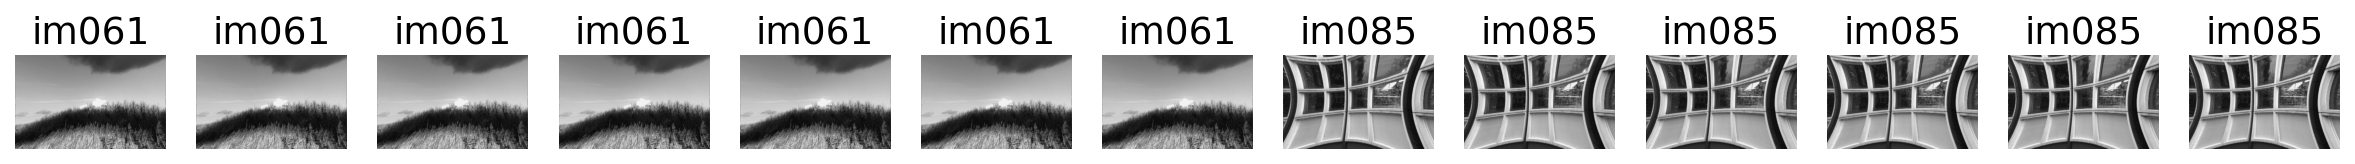

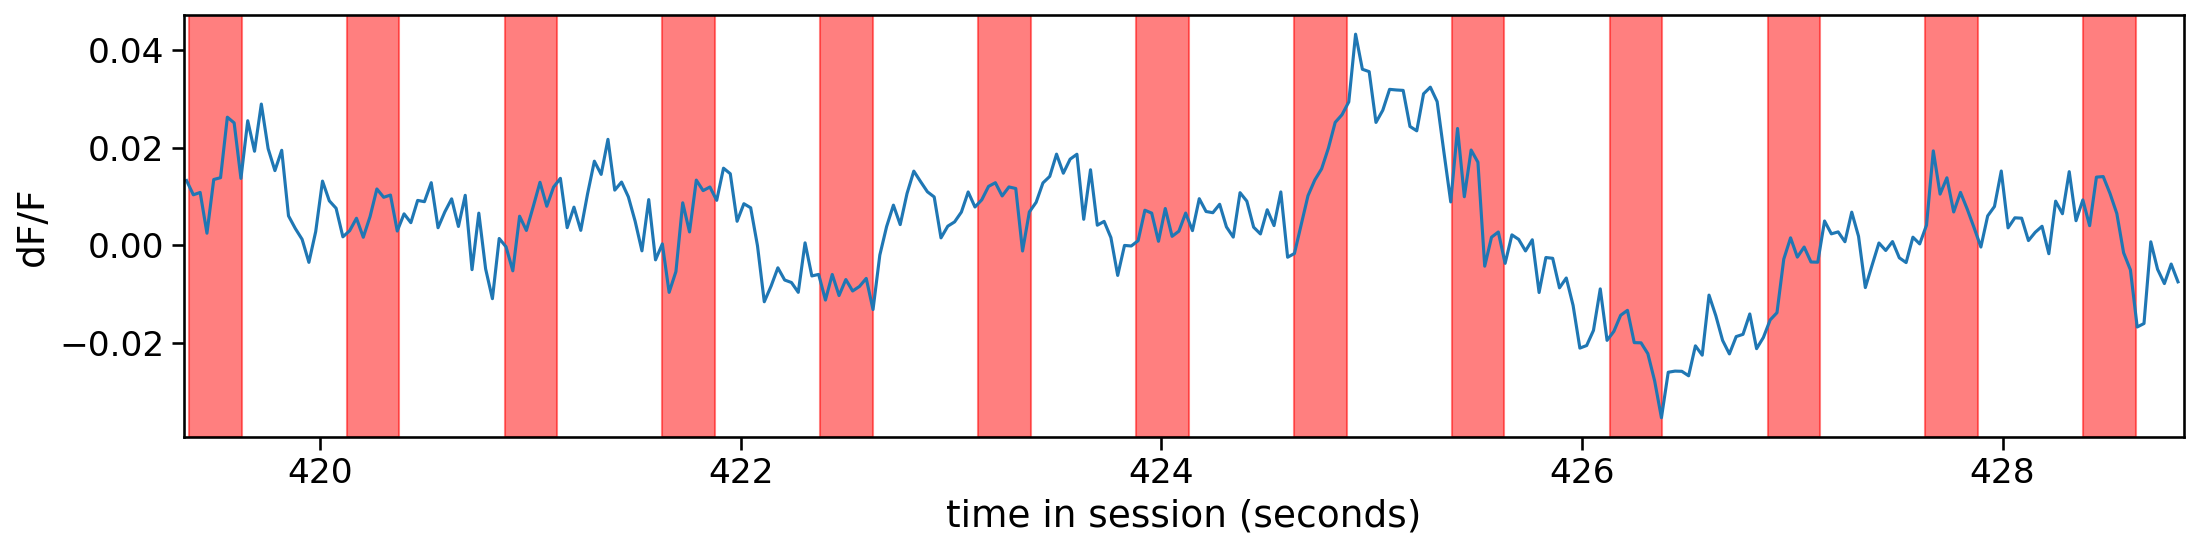

In [71]:
# pc trial
# Show the stimulus images with names
fig, axs = plot_images_with_time(pc_sample_trial.start_time_x, pc_sample_trial.stop_time_x, pc_sample_exp, pc_sample_trial)
plt.show()

# Plot the dF/F trace with time of stimulus presentation shown
stim, dff, trial_mask = make_trial_plot(pc_sample_exp, pc_sample_trial, cell_avg=True)

In [81]:
len(dff)

294

In [80]:
(np.where(trial_mask==True)[0])

array([12898, 12899, 12900, 12901, 12902, 12903, 12904, 12905, 12906,
       12907, 12908, 12909, 12910, 12911, 12912, 12913, 12914, 12915,
       12916, 12917, 12918, 12919, 12920, 12921, 12922, 12923, 12924,
       12925, 12926, 12927, 12928, 12929, 12930, 12931, 12932, 12933,
       12934, 12935, 12936, 12937, 12938, 12939, 12940, 12941, 12942,
       12943, 12944, 12945, 12946, 12947, 12948, 12949, 12950, 12951,
       12952, 12953, 12954, 12955, 12956, 12957, 12958, 12959, 12960,
       12961, 12962, 12963, 12964, 12965, 12966, 12967, 12968, 12969,
       12970, 12971, 12972, 12973, 12974, 12975, 12976, 12977, 12978,
       12979, 12980, 12981, 12982, 12983, 12984, 12985, 12986, 12987,
       12988, 12989, 12990, 12991, 12992, 12993, 12994, 12995, 12996,
       12997, 12998, 12999, 13000, 13001, 13002, 13003, 13004, 13005,
       13006, 13007, 13008, 13009, 13010, 13011, 13012, 13013, 13014,
       13015, 13016, 13017, 13018, 13019, 13020, 13021, 13022, 13023,
       13024, 13025,

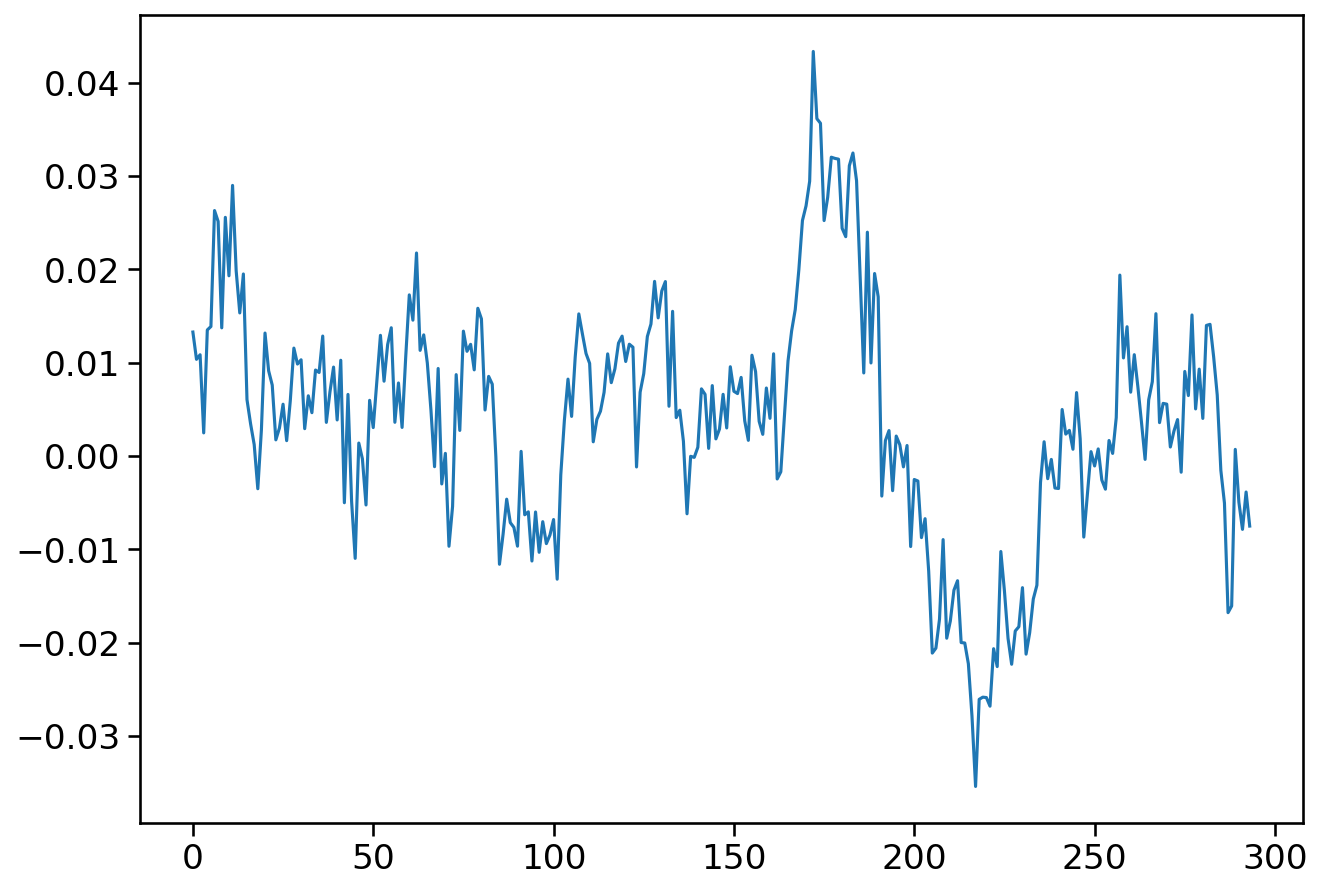

In [66]:
plt.plot(dff)

In [57]:
# np.where(stim==True)
st = stim[['start_time']]
et = stim[['end_time']]

In [60]:
st

,start_time
stimulus_presentations_id,
150,419.376137
151,420.126737
152,420.877617
153,421.627977
154,422.378587
155,423.129197
156,423.879797
157,424.630717
158,425.381037


In [59]:
et

,end_time
stimulus_presentations_id,
150,419.626347
151,420.377217
152,421.128027
153,421.878187
154,422.628777
155,423.379407
156,424.130017
157,424.881117
158,425.631247


In [56]:
stim[['start_time']] 

Index(['start_time'], dtype='object')

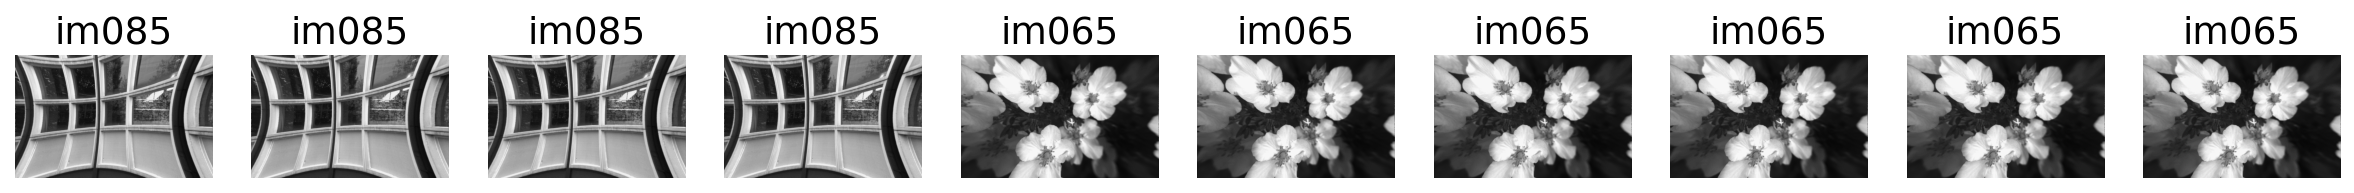

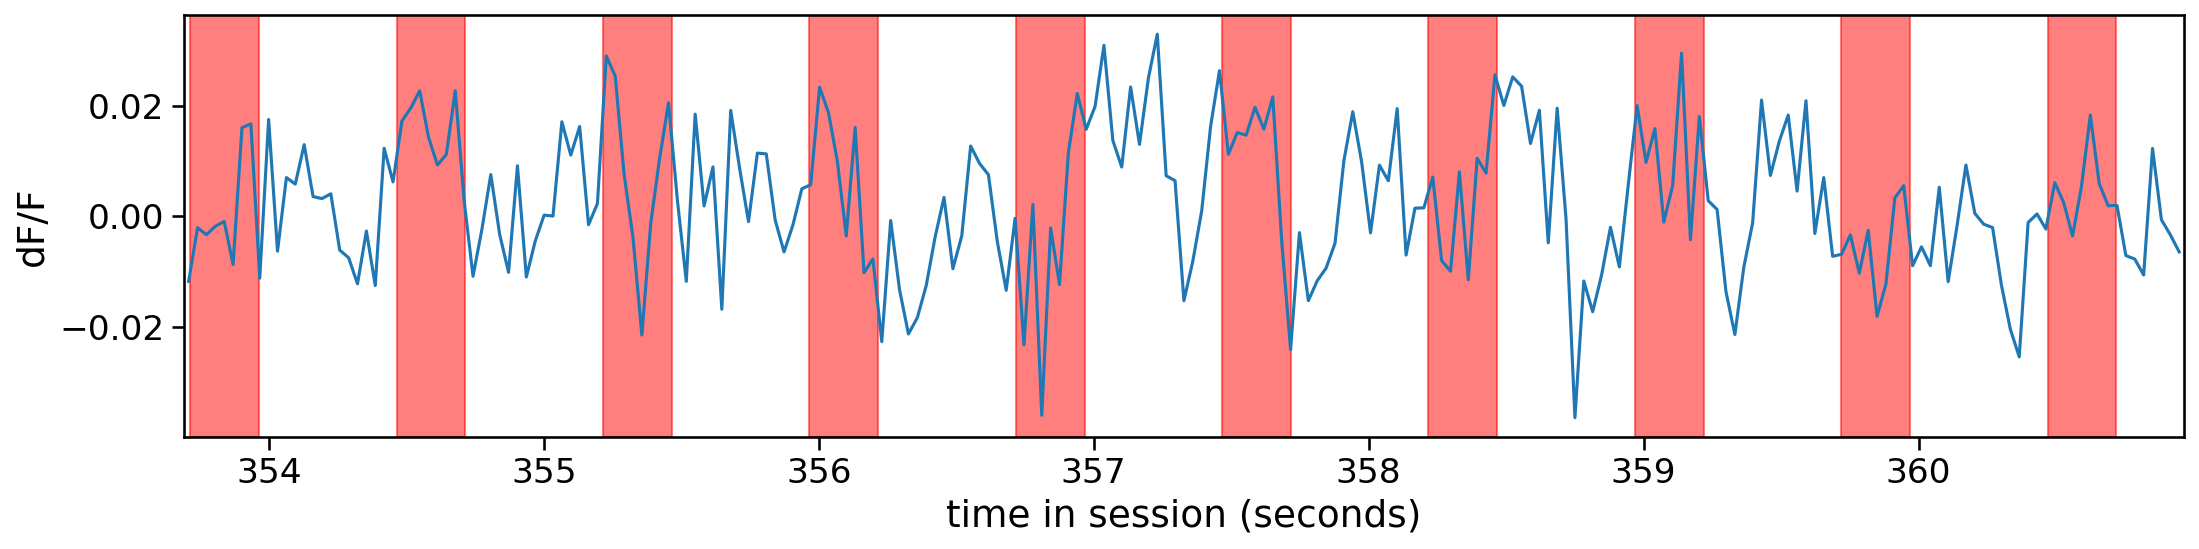

In [30]:
# vip trial
# Show the stimulus images with names
fig, axs = plot_images_with_time(vip_sample_trial.start_time_x, vip_sample_trial.stop_time_x, vip_sample_exp, vip_sample_trial)
plt.show()

# Plot the dF/F trace with time of stimulus presentation shown
make_trial_plot(vip_sample_exp, vip_sample_trial, cell_avg=True)

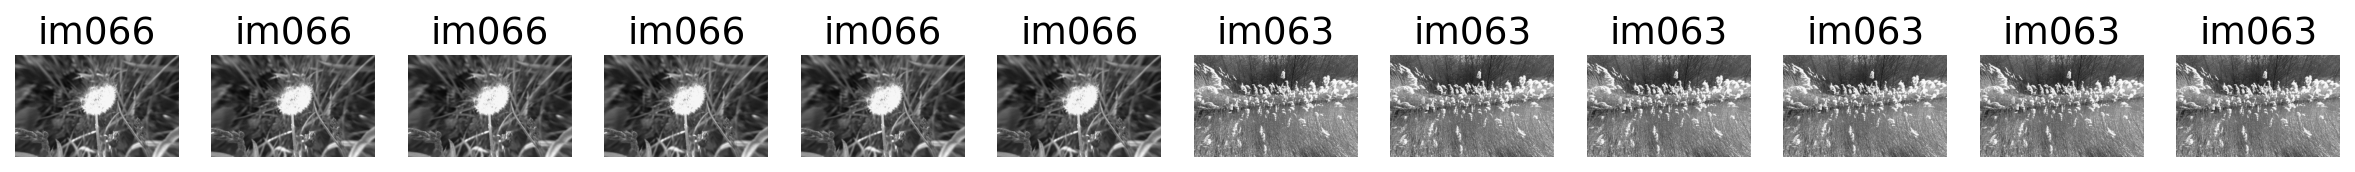

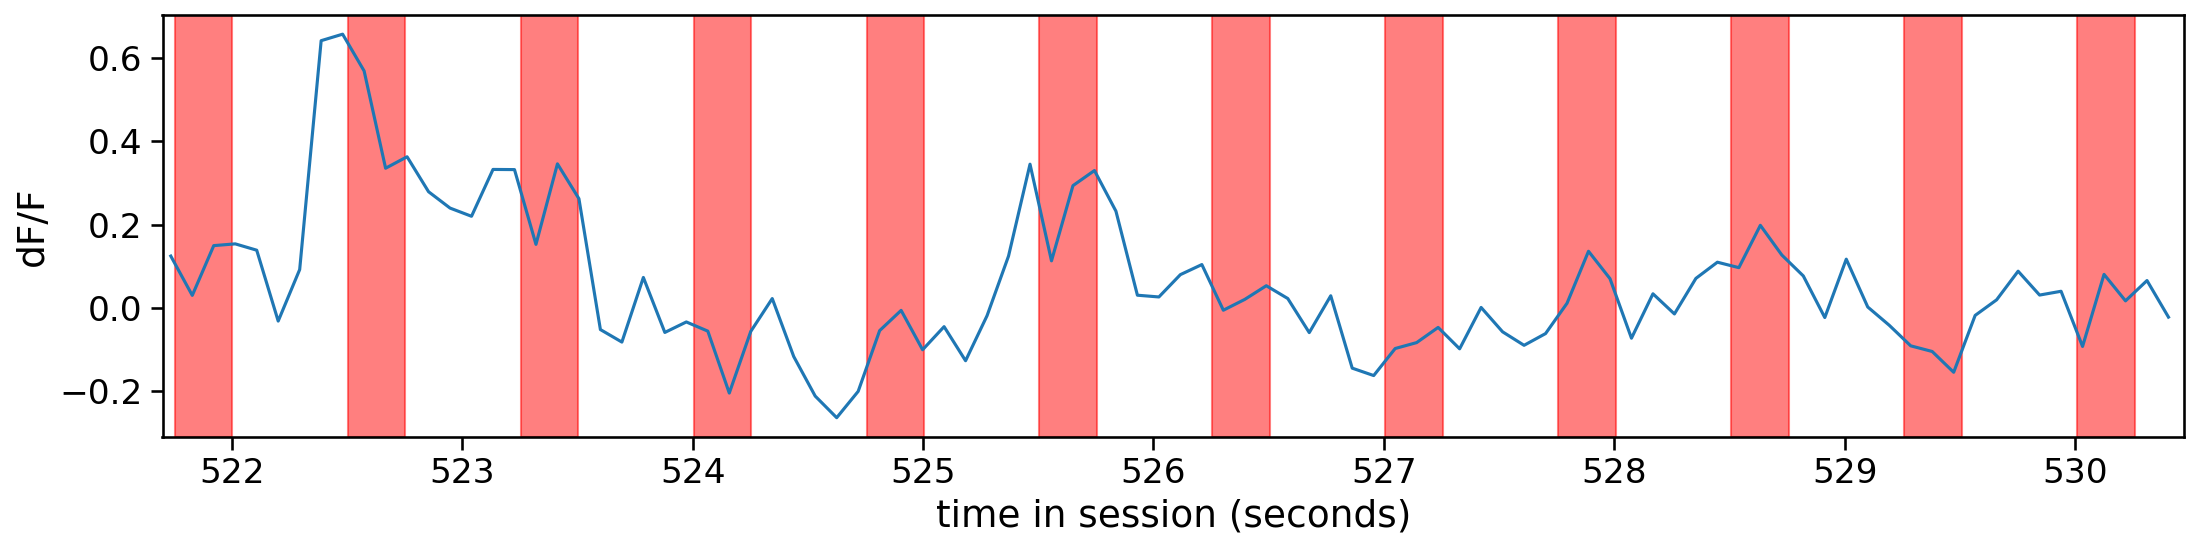

In [31]:
# sst trial
# Show the stimulus images with names
fig, axs = plot_images_with_time(sst_sample_trial.start_time_x, sst_sample_trial.stop_time_x, sst_sample_exp, sst_sample_trial)
plt.show()

# Plot the dF/F trace with time of stimulus presentation shown
make_trial_plot(sst_sample_exp, sst_sample_trial, cell_avg=True)